# Credit Card Segmentation Project


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# Reading dataset

In [2]:
df=pd.read_csv("CC GENERAL.csv")

In [3]:
print("Columns:", df.columns.tolist())

Columns: ['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# Exploratory Data analysis

In [4]:
print("shape:", df.shape)

shape: (8950, 18)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# statistics of dataset

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


# Checking duplicate rows

In [7]:
df.duplicated().sum() #no duplicate records

np.int64(0)

# Check for null values

In [8]:
missing=df.isnull().sum().sort_values(ascending=False)
missing

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CUST_ID                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [9]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
''' Preprocessing strategy
- Drop `CUST_ID` for modeling .
- Impute numeric missing values with mean/median.
- Scale features with `StandardScaler`.
-- Determine K with silhouette + elbow method, then fit KMeans.'''

In [10]:
df_orig = df.copy()

# Removing customer ID

In [11]:
df.drop('CUST_ID',axis=1,inplace=True)


# Check for skewness

In [12]:
df.skew().sort_values(ascending=False) #lot of data is right skew or positive skew 

MINIMUM_PAYMENTS                    13.622797
ONEOFF_PURCHASES                    10.045083
PURCHASES                            8.144269
INSTALLMENTS_PURCHASES               7.299120
PAYMENTS                             5.907620
CASH_ADVANCE_TRX                     5.721298
CASH_ADVANCE                         5.166609
PURCHASES_TRX                        4.630655
BALANCE                              2.393386
PRC_FULL_PAYMENT                     1.942820
CASH_ADVANCE_FREQUENCY               1.828686
ONEOFF_PURCHASES_FREQUENCY           1.535613
CREDIT_LIMIT                         1.522464
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
PURCHASES_FREQUENCY                  0.060164
BALANCE_FREQUENCY                   -2.023266
TENURE                              -2.943017
dtype: float64

# Histogram for Balance column

<Axes: >

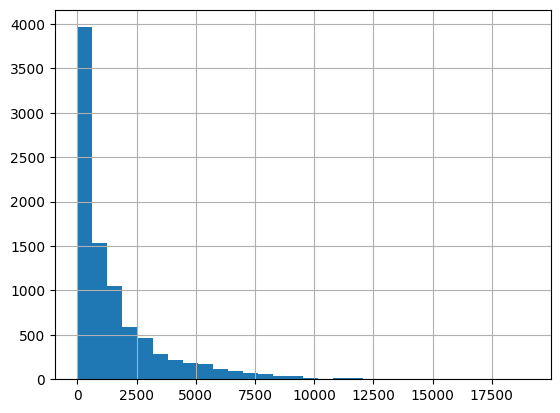

In [13]:
df['BALANCE'].hist(bins=30)

# Boxplot for cash advance

{'whiskers': [<matplotlib.lines.Line2D at 0x224ee543890>,
 'caps': [<matplotlib.lines.Line2D at 0x224ee543b10>,
 'boxes': [<matplotlib.lines.Line2D at 0x224ee543750>],
 'medians': [<matplotlib.lines.Line2D at 0x224ee543d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x224ee543ed0>],
 'means': []}

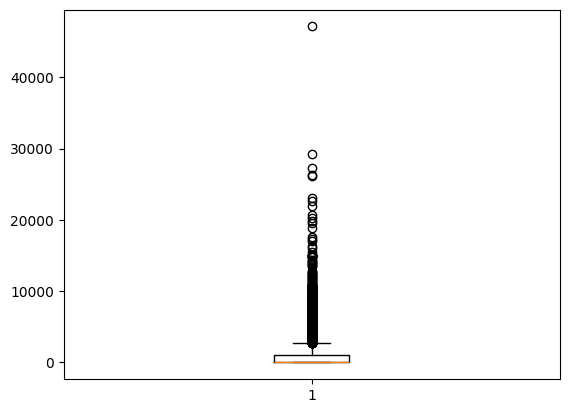

In [14]:
plt.boxplot(df['CASH_ADVANCE']) #higly right skewed,ouliers present

# Scatterplot

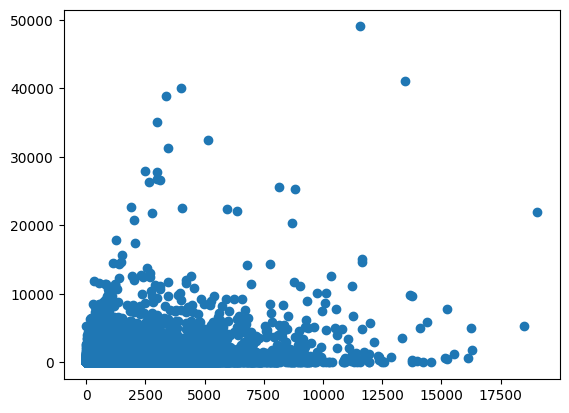

In [15]:
plt.scatter(df['BALANCE'], df['PURCHASES'])# tells High balance not equal to  high spending

# Heatmap visualization

<Axes: >

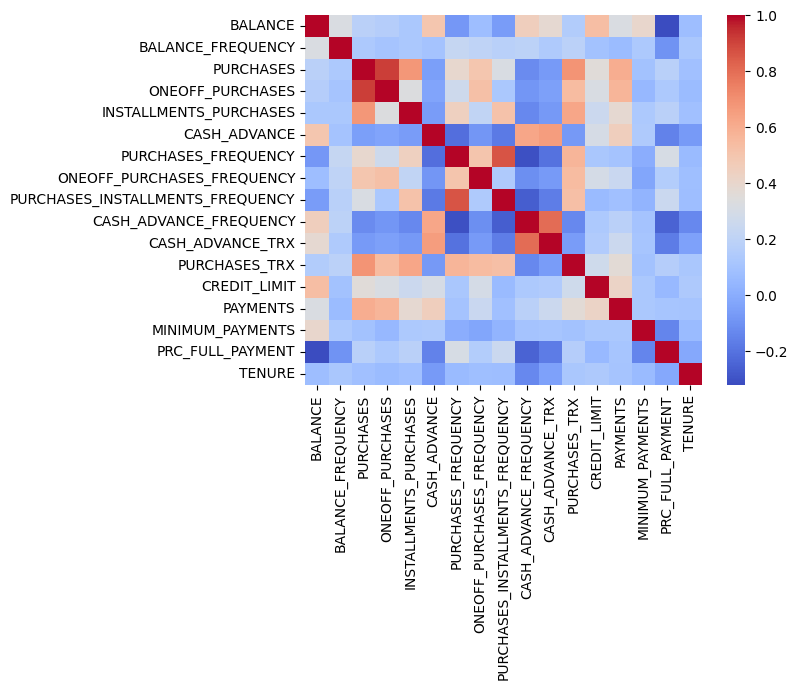

In [16]:
corr = df.corr()
#print(corr)
sns.heatmap(corr, cmap='coolwarm')

# Replace all Nan with median

In [17]:

df.fillna(df.median(), inplace=True) #since right skewed data and outliers are present median is safe.

In [18]:
# verify no missing
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# standardization

In [19]:

scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)
x_scaled = pd.DataFrame(x_scaled, columns=df.columns)
x_scaled.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960378,-0.528979,-0.302400,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688678,0.818642,0.097500,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826100,-0.383805,-0.093293,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826100,-0.598688,-0.228307,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905410,-0.364368,-0.257266,-0.525551,0.36068


# Elbow method to find number of clusters   

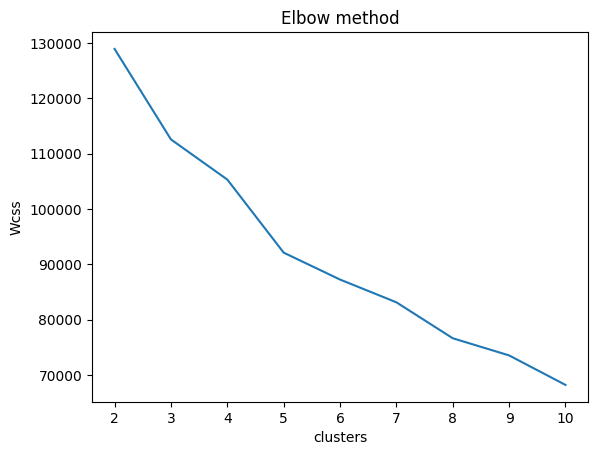

In [20]:
inertia=[]
K=range(2,11)
for i in K:
    kmean=KMeans(n_clusters=i,random_state=42)
    kmean.fit(x_scaled)
    inertia.append(kmean.inertia_)
plt.plot(K,inertia)
plt.xlabel("clusters")
plt.ylabel("Wcss")
plt.title("Elbow method")
plt.show()
    

# Finding silhouette score

In [21]:
silhouette_scores =[]

for k in K:  # silhouette requires k >= 2
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    labels = kmeans.fit_predict(x_scaled)
    
    score = silhouette_score(x_scaled, labels)
    silhouette_scores.append(score)    
    print(f"k = {k}, Silhouette Score = {score:.4f}")
#score near to 1 cluster are distinct
#score >0.5 overlapping clusters
#score negative wrong clsuter

k = 2, Silhouette Score = 0.2100
k = 3, Silhouette Score = 0.2510
k = 4, Silhouette Score = 0.1977
k = 5, Silhouette Score = 0.1931
k = 6, Silhouette Score = 0.2029
k = 7, Silhouette Score = 0.2077
k = 8, Silhouette Score = 0.2217
k = 9, Silhouette Score = 0.2260
k = 10, Silhouette Score = 0.2204


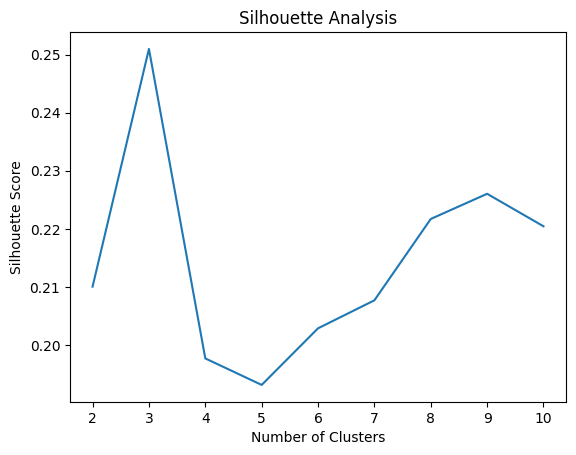

In [22]:
plt.plot(K, silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()


# Kmeans clustering

In [23]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(x_scaled)


In [24]:
df['Cluster'] = clusters


In [25]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,2
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6,3
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,3


# Display Cluster value counts

In [26]:
print("Cluster distribution:")
print(df['Cluster'].value_counts())


Cluster distribution:
Cluster
3    3368
2    3118
1    1487
0     977
Name: count, dtype: int64


# Cluster grouping

In [27]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


             BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5010.394668           0.966663   716.017789        450.235875   
1         108.430006           0.412096   350.247868        190.521089   
2        1253.817942           0.974758  2182.022178       1241.768493   
3        1495.324927           0.966467   283.482824        210.004454   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    265.885977   5065.974690             0.327150   
1                    160.197189    299.482324             0.320591   
2                    940.517248    234.564524             0.928413   
3                     73.794186    782.285268             0.207097   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                      

# PCA for visualization

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_scaled)


In [29]:
pca_df = pd.DataFrame({
    'PCA_1': X_pca[:, 0],
    'PCA_2': X_pca[:, 1],
    'Cluster': clusters
})


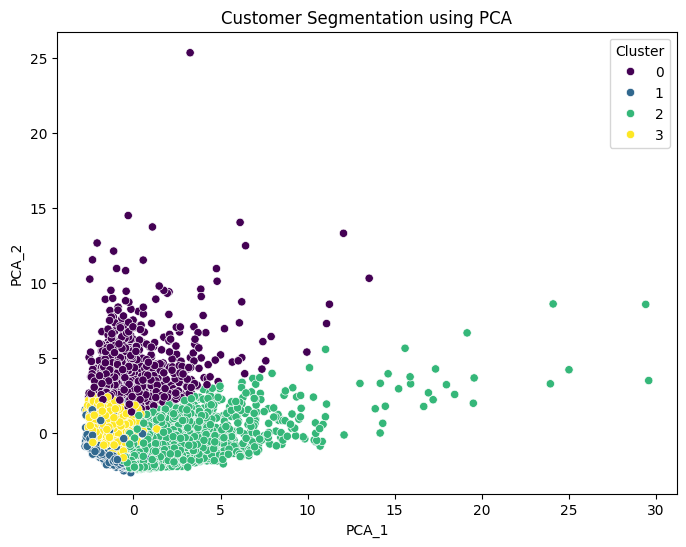

In [30]:
plt.figure(figsize=(8,6))

sns.scatterplot(
    data=pca_df,
    x='PCA_1',
    y='PCA_2',
    hue='Cluster',
    palette='viridis'
)

plt.title("Customer Segmentation using PCA")
plt.show()


# Checking Explained variance Ratio

In [31]:
variance_ratio=pca.explained_variance_ratio_
print(variance_ratio)
print(variance_ratio.sum()) #48 % information retained


[0.27297671 0.2031378 ]
0.4761145096128464


# Mapping cluster names

In [32]:
cluster_names = {
    0: 'High-Risk Revolving Credit Users',
    1: 'Low-Usage / Inactive Customers',
    2: 'High-Value Active Customers',
    3: 'Cash-Dependent Financially Stressed Customers'
}

df['Cluster_Name'] = df['Cluster'].map(cluster_names)


In [33]:
df[['Cluster', 'Cluster_Name']].head()

,Cluster,Cluster_Name
0,3,Cash-Dependent Financially Stressed Customers
1,0,High-Risk Revolving Credit Users
2,2,High-Value Active Customers
3,3,Cash-Dependent Financially Stressed Customers
4,3,Cash-Dependent Financially Stressed Customers


# Saving final csv

In [34]:
df.to_csv('cluster.csv',index=False)

In [ ]:
#!pip install streamlit

In [ ]:
#in_data=scaler.fit_transform([[40.900749,0.818182,95.4,0.0,95.4,0.0,0.166667,0.0,0.083333,0.0,0,2,1000.0,201.802084,139.509787,0.0,12]])
#in_data=scaler.fit_transform([[3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.0,0.0,0.0,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12]])

# Saving Final model

In [45]:
import pickle 
filename="Finalized_ClusterModel.sav"
pickle.dump(kmeans,open(filename,'wb'))

In [49]:
new_input=scaler.transform([[627.260806,1.0,7091.01,6402.63,688.38,0.0,1.0,1.0,1.0,0.0,0,64,13500.0,6354.314328,198.065894,1.0,12]])
loaded_model=pickle.load(open("Finalized_ClusterModel.sav",'rb'))
result=loaded_model.predict(new_input)
clust=result[0]
print("cluster is:",clust)
clust_name=cluster_names[clust]
print("Cluster name is:",clust_name)

cluster is: 2
Cluster name is: High-Value Active Customers


C:\Users\huawei\anaconda3\envs\aiml\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
